<a href="https://colab.research.google.com/github/collvey/Biopython/blob/main/Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# Configs

In [621]:
N_DATA = 500
N_FEATURES = 2
MODEL_TYPE = 'gbm'
TRAINING_RATE = 0.8

# Data Generation

In [622]:
temp = np.random.rand(N_DATA) * 80 # temp + pH
ph = np.random.rand(N_DATA) * 14 # temp + pH
data_x = np.array([temp, ph]).T
rate = (temp**2 + 10*temp*ph + 5*ph**2) * 100 # production rate
rate = rate/max(rate)

# Model Training

In [624]:
# Separate training and testing
data_x_training = data_x[:int(N_DATA * TRAINING_RATE), :]
rate_training = rate[:int(N_DATA * TRAINING_RATE)]
data_x_testing = data_x[int(N_DATA * TRAINING_RATE):, :]
rate_testing = rate[int(N_DATA * TRAINING_RATE):]

In [625]:
model_dict = {"rf": RandomForestRegressor(), "gbm": GradientBoostingRegressor(), 'ada': AdaBoostRegressor()}
model = model_dict[MODEL_TYPE]
model.fit(data_x_training, rate_training)

GradientBoostingRegressor()

# Model Evaluation

In [626]:
model.feature_importances_

array([0.75048224, 0.24951776])

In [627]:
inter_temp = np.arange(0, 80, 2)
inter_ph = np.arange(0, 14, 0.5)
X,Y = np.meshgrid(inter_temp, inter_ph)
input_data=np.array([X.flatten(),Y.flatten()]).T

In [628]:
predict = model.predict(input_data)

# Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


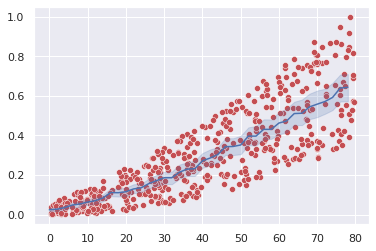

In [629]:
sns.set_theme(style="darkgrid")

sns.scatterplot(temp.flatten(), rate, color="r")
sns.lineplot(input_data[:,0], predict)
plt.show()

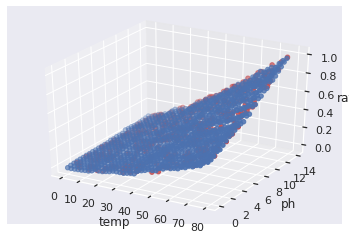

In [630]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = temp
y = ph
z = rate

ax.set_xlabel("temp")
ax.set_ylabel("ph")
ax.set_zlabel("rate")

ax.scatter(x, y, z, color='r')
ax.scatter(input_data[:,0], input_data[:,1], predict)

plt.show()

# Prediction Validation

In [631]:
predicted_testing = model.predict(data_x_testing)

In [632]:
accuracy_data = np.vstack([predicted_testing, rate_testing]).T

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


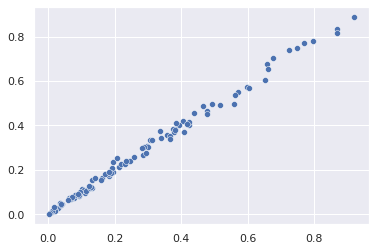

In [633]:
sns.set_theme(style="darkgrid")

sns.scatterplot(rate_testing, predicted_testing, color="b")
plt.show()

In [634]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(rate_testing, predicted_testing))

0.018201734069322385

In [635]:
from sklearn.metrics import r2_score

r2_score(rate_testing, predicted_testing)

0.99368131878716